# Implementation verification: Toxicokinetics

In [50]:
using Revise
@time using DEBBase
@time using DoseResponse
using DataFrames
using BenchmarkTools
using Plots, StatsPlots, Plots.Measures
default(leg = false, lw = 1.5, titlefontsize = 10)

  0.001566 seconds (456 allocations: 30.617 KiB)
  0.001494 seconds (456 allocations: 30.625 KiB)


## Single stressor - single PMoA

In [40]:
C_W_vec = 10 .^ range(log10(0.1), log10(2), 3) |> x -> round.(x, sigdigits = 2)
k_D_vec = 10 .^ range(log10(0.01), log10(1.0), 5) |> x -> round.(x, sigdigits = 2);

In [92]:
using DEBBase

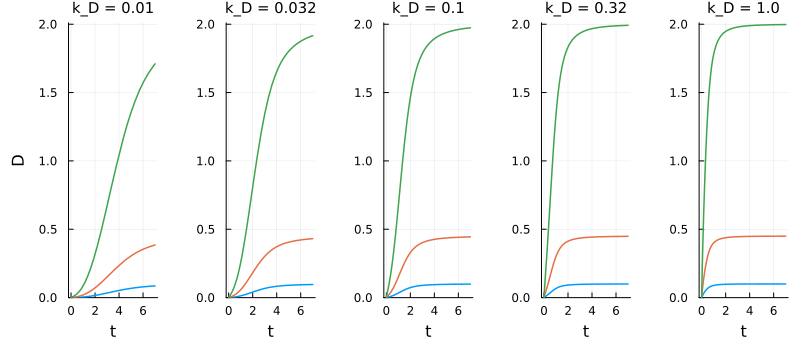

In [93]:
p = plot(
    layout = (1,length(k_D_vec)), 
    title = hcat(["k_D = $(k_D)" for k_D in unique(k_D_vec)]...),
    xlabel = "t",
    ylabel = ["D" "" "" "" ""],
    size = (800,350), 
    bottommargin = 5mm,
    leftmargin = 5mm, 
    ylim = (0, 2.01)
    )

for (i,k_D) in enumerate(k_D_vec)
    for C_W in C_W_vec

        glb = GlobalBaseParams(C_W = [C_W], t_max = 7)
        deb = DEBBaseParams(
            k_D = [k_D]
            )
        out = simulator(glb, deb)
        
        @df out plot!(p, :t, :D_1_1, subplot = i)
    end
end
display(p)

## Single stressor - multiple PMoAs

In [100]:
using DEBBase

In [101]:
hcat([1.; 1. * .5]...)

1×2 Matrix{Float64}:
 1.0  0.5

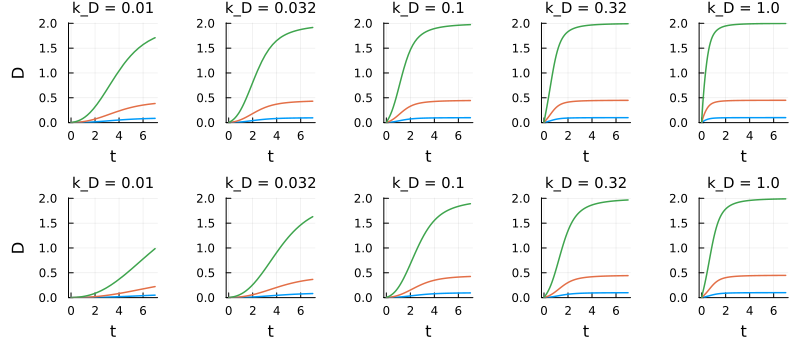

In [110]:
p = plot(
    layout = (2,length(k_D_vec)), 
    title = hcat(["k_D = $(k_D)" for k_D in unique(k_D_vec)]...),
    xlabel = "t",
    ylabel = ["D" "" "" "" ""],
    size = (800,350), 
    bottommargin = 5mm,
    leftmargin = 5mm, 
    ylim = (0, 2.01)
    )

for (i,k_D) in enumerate(k_D_vec)
    for C_W in C_W_vec

        glb = GlobalBaseParams(C_W = [C_W], t_max = 7)
        deb = DEBBaseParams(
            k_D = hcat([k_D; k_D * .25]...)
            )
        out = simulator(glb, deb)
        
        @df out plot!(p, :t, :D_1_1, subplot = i)
        @df out plot!(p, :t, :D_2_1, subplot = i + length(k_D_vec))
    end
end
display(p)

## Varying the number of stressors

2-element view(::Vector{Float64}, 6:7) with eltype Float64:
 0.0
 0.0

In [ ]:
DataFrame()

In [78]:
fieldnames(out.u[1])

(:data, :axes)

In [72]:
p = plot(
    layout = (1,2), 
    title = ["Stressor 1 (fast TK)" "Stressor 2 (slow TK)"],
    xlabel = "t",
    ylabel = ["D" "" "" "" ""],
    size = (800,350), 
    bottommargin = 5mm,
    leftmargin = 5mm, 
    ylim = (0, 2.01)
    )


for C_W in C_W_vec

    glb = GlobalBaseParams(C_W = [C_W, C_W], t_max = 7)
    deb = DEBBaseParams(
        k_D = [1., 0.1]
        )
    out = simulator(glb, deb)

    @df out plot!(p, :t, :D_1_1, subplot = 1) # damage for stressor 1 / pmoa G
    @df out plot!(p, :t, :D_2, subplot = 2) # damage for stressor 2 / pmoa G
end

display(p)

ErrorException: Cannot convert Symbol to series data for plotting

In [59]:
using DEBBase

In [63]:
glb = GlobalBaseParams()
deb = DEBBaseParams()
out = simulator(glb, deb)
[u.D for u in out.u]

87-element Vector{SubArray{Float64, 1, Vector{Float64}, Tuple{UnitRange{Int64}}, true}}:
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 ⋮
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]

In [56]:
p = plot(
    layout = (1,3), 
    title = ["Stressor 1 (fast TK)" "Stressor 2 (slow TK)" "Stressor 3 (very slow TK)"],
    xlabel = "t",
    ylabel = ["D" "" "" "" ""],
    size = (900,350), 
    bottommargin = 5mm,
    leftmargin = 5mm, 
    ylim = (0, 2.01)
    )

for (i,k_D) in enumerate(k_D_vec)
    for C_W in C_W_vec

        glb = GlobalBaseParams(C_W = [C_W, C_W, C_W], t_max = 7)
        deb = DEBBaseParams(
            k_D =[1., 0.1, 0.01],
            drc_functs = [
                LL2 LL2M LL2 LL2 LL2h; 
                LL2 LL2M LL2 LL2 LL2h; 
                LL2 LL2M LL2 LL2 LL2h
            ],
            drc_params = [
                (1., 2.) (1., 2.) (1., 2.) (1., 2.) (1., 2.);
                (1., 2.) (1., 2.) (1., 2.) (1., 2.) (1., 2.);
                (1., 2.) (1., 2.) (1., 2.) (1., 2.) (1., 2.)
            ]
            )
        out = simulator(glb, deb)

        @df out plot!(p, :t, :D_1_1, subplot = 1)
        @df out plot!(p, :t, :D_1_2, subplot = 2)
        @df out plot!(p, :t, :D_1_3, subplot = 3)
    end
end
display(p)

DimensionMismatch: DimensionMismatch: Number of columns (12) and number of column names (18) are not equal

## PMoA-specific TK

## Modifying the model: Simplified TK

In [52]:
less(DEBBase.Ddot)

function Ddot(
    glb::AbstractParams,
    deb::AbstractParams,
    du::ComponentVector,
    u::ComponentVector
    )

    let L_S = u.S^(1/3) / u.S, # strucutral length (g^(1/3))
        # TODO: move calculation of L_S_max out so it is only calculated once, not at every step
        L_S_max = calc_S_max(deb)^(1/3) # maximum structural length (g^(1/3))
        return @. deb.k_D * (L_S_max / L_S) * (u.C_W - u.D) - u.D * du.S / u.S
    end
end



"""
Definition of reserveless DEB derivatives. 
$(TYPEDSIGNATURES)
"""
function DEB!(du, u, p, t)

    #### boilerplate

    glb::GlobalBaseParams, deb::DEBBaseParams = p # unpack parameters
    @unpack X_p, X_emb, S, H, R, D, C_W = u # unpack state variables

    S = max(0, S) # control for negative values
    life_stage = determine_life_stage(deb; H = H, X_emb = X_emb)
    
    #### auxiliary state variables

    idot = Idot(glb, deb; X_p = X_p, life_stage = life_stage, S = S)
    adot = Adot(deb; Idot = idot)
    mdot = Mdot(deb; S = S)
    